In [2]:

# Import Libraries
import pandas as pd
import numpy as np
import os
from dask import dataframe as dd

import matplotlib.pyplot as plt
import seaborn as sns

import datetime
from dateutil.relativedelta import relativedelta

def displayDataFrame(df):
    with pd.option_context('display.max_columns', None):
        display(df)
    
def SummaryDataFrame(df, ConditionName):
    print('-----------------------------')
    print('\033[1m' + ConditionName.upper() + '\033[0m')
    print('\033[1m Columns: \033[0m')
    print(df.columns)
    print('\033[1m Size of dataset: \033[0m', df.shape)
    displayDataFrame(df.head(2))
    


## Number of readmissions per patient

In [7]:

# Open Readmission Count Files
Datasets = ['dementia', 'autism', 'diabetes']

def OpenFile(dataset):
    Path = r"O:\GIRFT DiRAC\FlavienHardy\1_DataConsistency\Data\1_Processed"
    FileName = dataset + "_NumberReadmissions.csv"
    FilePath = os.path.join(Path, FileName)
    df_dataset = pd.read_csv(FilePath)
    
    return df_dataset

df_DementiaRead = OpenFile('Dementia')
df_autismRead = OpenFile('Autism')
df_diabetesRead = OpenFile('Diabetes')

df_diabetesRead.head()


,Unnamed: 0,HESID,Number Spells,Number Readmissions
0,0,0005MWSQ5R4HJ9V,27,26
1,1,000CSVYZS9NHVBE,1,0
2,2,000KQV8L5YG543S,3,2
3,3,001KTF8LSHUR4FE,2,1
4,4,002VIWQKZPG2D0C,3,2


<ipython-input-49-03232c65f5fe>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.arange(7)*10);


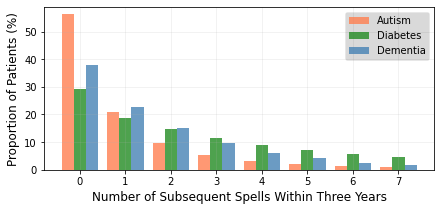

In [49]:

fig, ax = plt.subplots(figsize=(7,3))

def ColumnFiltered(df, Column, MaxVal):
    Filter = df.loc[:, Column] <= MaxVal
    
    return df.loc[Filter, Column]

# Create secondary dataframes to plot
Column = 'Number Readmissions'
MaxVal = 7
ReadCount_dementia = ColumnFiltered(df_DementiaRead, Column, MaxVal)
ReadCount_autism = ColumnFiltered(df_autismRead, Column, MaxVal)   
ReadCount_diabetes = ColumnFiltered(df_diabetesRead, Column, MaxVal)   

# Plot
ColourMap = plt.cm.Accent
ColourMap(0)
plt.hist([ReadCount_autism, ReadCount_diabetes, ReadCount_dementia],
        density=True, bins=np.arange(MaxVal+2)-0.5,
        label = ['Autism', 'Diabetes', 'Dementia'],
        zorder=0,
        color=['coral', 'forestgreen', 'steelblue'],
        alpha=0.8);

# Options
plt.xticks(range(0,MaxVal+1));
plt.legend(loc='upper right', facecolor='black', framealpha=0.15)
plt.grid('on', alpha = 0.2)
plt.xlabel('Number of Subsequent Spells Within Three Years', fontsize=12);
plt.ylabel('Proportion of Patients (%)', fontsize=12);
ax.set_yticklabels(np.arange(7)*10);

SaveFig = True
if SaveFig:
    plt.savefig(r"O:\GIRFT DiRAC\FlavienHardy\1_DataConsistency\Figures\ReadmissionCount_22.01.25.png",
                bbox_inches='tight', dpi=300)
    
    

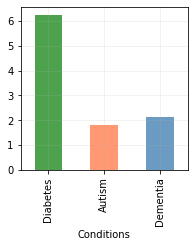

In [9]:

Mean_Dementia = df_DementiaRead.loc[:, 'Number Readmissions'].mean()
Mean_Autism = df_autismRead.loc[:, 'Number Readmissions'].mean()
Mean_Diabetes = df_diabetesRead.loc[:, 'Number Readmissions'].mean()
Conditions = [ 'Diabetes', 'Autism', 'Dementia' ]
Mean_Read = [ Mean_Diabetes, Mean_Autism, Mean_Dementia ]
d = {'Conditions':Conditions, 'Mean Number Readmissions':Mean_Read}
df_MeanRead = pd.DataFrame(data=d)
df_MeanRead.head()

df_MeanRead.plot.bar( x='Conditions', y='Mean Number Readmissions',
                    color=['forestgreen', 'coral', 'steelblue'],
                    alpha=0.8,
                    figsize=(3,3),
                    legend=None);
plt.grid('on', alpha = 0.2)


## Profiles of first spells

### Import processed datasets

In [3]:

ReadCSV = True

def OpenFile(dataset):
    print('Importing', dataset, '...')
    Path = r"O:\GIRFT DiRAC\FlavienHardy\1_DataConsistency\Data\1_Processed"
    FileName = dataset + "_SpellLevel_FeatureEngineered_21.12.09.csv"
    FileName = dataset + "_SpellLevel_FeatureEngineered.csv"
    FilePath = os.path.join(Path, FileName)
    df_dataset = pd.read_csv(FilePath)
    
    return df_dataset

if ReadCSV:
    df_dementia_ini = OpenFile('Dementia')
    df_autism_ini = OpenFile('Autism')
    df_diabetes_ini = OpenFile('Diabetes')
    print('\033[1m DONE \033[0m')
    
SummaryDataFrame(df_dementia_ini, 'Dementia')
SummaryDataFrame(df_autism_ini, 'Autism')
SummaryDataFrame(df_diabetes_ini, 'Diabetes')


# Path = r"O:\GIRFT DiRAC\FlavienHardy\1_DataConsistency\Data\1_Processed"
# FileName_dementia = "Dementia_FeatureEngineered_SpellLevel_EthnicityIMD.csv"
# FileName_autism = "Autism_FeatureEngineered_SpellLevel_EthnicityIMD.csv"
# # FileName_diabetes = "Diabetes_FeatureEngineered_SpellLevel_EthnicityIMD.csv"

# FilePath_dementia = os.path.join(Path, FileName_dementia)
# FilePath_autism = os.path.join(Path, FileName_autism)
# # FilePath_diabetes = os.path.join(Path, FileName_diabetes)

# # IMD scores
# Path_IMD = r"O:\GIRFT DiRAC\FlavienHardy\1_DataConsistency\Data\0_Raw"
# FileName_IMD = "File_7_ID_2015_All_ranks__deciles_and_scores_for_the_Indices_of_Deprivation__and_population_denominators.csv"
# FilePath_IMD = os.path.join(Path_IMD, FileName_IMD)


# if ReadCSV:
#     df_dementia_ini = pd.read_csv(FilePath_dementia)
#     df_autism_ini = pd.read_csv(FilePath_autism)
# #     df_diabetes_ini = pd.read_csv(FilePath_diabetes)

# #     df_IMD = pd.read_csv(FilePath_IMD)


Importing Dementia ...
Importing Autism ...
Importing Diabetes ...
 DONE 
-----------------------------
DEMENTIA
 Columns: 
Index(['Unnamed: 0', 'P_Spell_ID', 'HESID', 'LSOA_2011_Code', 'Admission_date',
       'Discharge_date', 'EPIstart', 'EPIend', 'diagnosis_group', 'Spell_Los',
       'sex', 'age_of_patient', 'Ethnicity', 'IMD_Score', 'IMD_Decile',
       'HFRS_Score', 'HFRS_Band', 'ProvCode', 'Main_Specialty_Description',
       'POD', 'MORT', 'Read30', 'Read90', 'TimeDiff_FirstSpell', 'Region',
       'Missing_Age', 'Missing_IMD_Score', 'POD_Elective', 'POD_Emergency',
       'Missing_POD', 'ProvCode_PrivateProv', 'Spell_Los_0',
       'FirstSpell_P_Spell_ID', 'FirstSpell_Admission_date',
       'FirstSpell_Discharge_date', 'FirstSpell_ProvCode', 'FirstSpell_POD',
       'FirstSpell_Main_Specialty_Description', 'FirstSpell_Region',
       'FirstSpell_ProvCode_PrivateProv', 'Change_ProvCode', 'Change_Region',
       'Change_Main_Specialty_Description', 'Change_ProvCode_Type',
    

,Unnamed: 0,P_Spell_ID,HESID,LSOA_2011_Code,Admission_date,Discharge_date,EPIstart,EPIend,diagnosis_group,Spell_Los,sex,age_of_patient,Ethnicity,IMD_Score,IMD_Decile,HFRS_Score,HFRS_Band,ProvCode,Main_Specialty_Description,POD,MORT,Read30,Read90,TimeDiff_FirstSpell,Region,Missing_Age,Missing_IMD_Score,POD_Elective,POD_Emergency,Missing_POD,ProvCode_PrivateProv,Spell_Los_0,FirstSpell_P_Spell_ID,FirstSpell_Admission_date,FirstSpell_Discharge_date,FirstSpell_ProvCode,FirstSpell_POD,FirstSpell_Main_Specialty_Description,FirstSpell_Region,FirstSpell_ProvCode_PrivateProv,Change_ProvCode,Change_Region,Change_Main_Specialty_Description,Change_ProvCode_Type,SpellLevel_ICD10,SpellLevel_ICD10_Dementia,SpellLevel_ICD10_Parkinson,SpellLevel_ICD10_ParkinsonsDementia,SpellLevel_FirstDiagnosis,SubsequentSpell,SpellLevel_Error_Dementia
0,0,1421,00007773EC3BDCAF9441AFA32057315D,E01008446,2020-09-04,2020-09-18,2020-09-07,2020-09-18,G20X~F023~R410~R441~R630~D529~E559~I951~M549~G...,14,Male,81,not known,7.717,9.0,0.0,None,RTD,geriatric medicine,EM,0,NaN,NaN,-14.0,North East & Yorkshire,0,0,0,1,0,0,0,1421.0,2020-09-04,2020-09-18,RTD,EM,geriatric medicine,North East & Yorkshire,0,0,0,0,0,R410~E86X~R630~G20X~F067~G473~I679~D333~Z922~Z...,1,1,1,1,0,0
1,1,8786,0002CF863631188C9524321D4710EF31,E01021334,2014-07-03,2014-07-17,2014-07-12,2014-07-17,N390~U898~N182~G20XD~F023A~K590~R33X~R600~R680...,14,Female,88,white,14.370,6.0,0.0,None,RAJ,geriatric medicine,EM,0,NaN,NaN,-14.0,East of England,0,0,0,1,0,0,0,8786.0,2014-07-03,2014-07-17,RAJ,EM,geriatric medicine,East of England,0,0,0,0,0,N390~U898~N182~G20XD~F023A~K590~R33X~R600~R680...,1,1,1,1,0,0


-----------------------------
AUTISM
 Columns: 
Index(['Unnamed: 0', 'P_Spell_ID', 'HESID', 'LSOA_2011_Code', 'Admission_date',
       'Discharge_date', 'EPIstart', 'EPIend', 'diagnosis_group', 'Spell_Los',
       'sex', 'age_of_patient', 'Ethnicity', 'IMD_Score', 'IMD_Decile',
       'HFRS_Score', 'HFRS_Band', 'ProvCode', 'Main_Specialty_Description',
       'POD', 'MORT', 'Read30', 'Read90', 'TimeDiff_FirstSpell', 'Region',
       'Missing_Age', 'Missing_IMD_Score', 'POD_Elective', 'POD_Emergency',
       'Missing_POD', 'ProvCode_PrivateProv', 'Spell_Los_0',
       'FirstSpell_P_Spell_ID', 'FirstSpell_Admission_date',
       'FirstSpell_Discharge_date', 'FirstSpell_ProvCode', 'FirstSpell_POD',
       'FirstSpell_Main_Specialty_Description', 'FirstSpell_Region',
       'FirstSpell_ProvCode_PrivateProv', 'Change_ProvCode', 'Change_Region',
       'Change_Main_Specialty_Description', 'Change_ProvCode_Type',
       'SpellLevel_ICD10', 'SpellLevel_ICD10_Autism',
       'SpellLevel_FirstDi

,Unnamed: 0,P_Spell_ID,HESID,LSOA_2011_Code,Admission_date,Discharge_date,EPIstart,EPIend,diagnosis_group,Spell_Los,sex,age_of_patient,Ethnicity,IMD_Score,IMD_Decile,HFRS_Score,HFRS_Band,ProvCode,Main_Specialty_Description,POD,MORT,Read30,Read90,TimeDiff_FirstSpell,Region,Missing_Age,Missing_IMD_Score,POD_Elective,POD_Emergency,Missing_POD,ProvCode_PrivateProv,Spell_Los_0,FirstSpell_P_Spell_ID,FirstSpell_Admission_date,FirstSpell_Discharge_date,FirstSpell_ProvCode,FirstSpell_POD,FirstSpell_Main_Specialty_Description,FirstSpell_Region,FirstSpell_ProvCode_PrivateProv,Change_ProvCode,Change_Region,Change_Main_Specialty_Description,Change_ProvCode_Type,SpellLevel_ICD10,SpellLevel_ICD10_Autism,SpellLevel_FirstDiagnosis,SubsequentSpell,SpellLevel_Error_Autism
0,0,106,00000BB5E7DC3BAB1D477FC33FB398CD,E01020243,2015-09-09,2015-09-11,2015-09-09,2015-09-11,I214~I251~I501~E780~F845~F419~J459~-1~-1~-1~-1...,2,Male,52,white,14.369,6.0,0.0,None,RH8,cardiology,EM,0,NaN,NaN,-2.0,South West,0,0,0,1,0,0,0,106.0,2015-09-09,2015-09-11,RH8,EM,cardiology,South West,0,0,0,0,0,I214~I251~I501~E780~F845~F419~J459,1,1,0,0
1,1,107,00000BB5E7DC3BAB1D477FC33FB398CD,E01020243,2018-11-30,2018-11-30,2018-11-30,2018-11-30,Z121~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1...,0,Male,55,white,14.369,6.0,0.0,None,RH8,nursing episode,DC,0,NaN,NaN,1176.0,South West,0,0,1,0,0,0,1,106.0,2015-09-09,2015-09-11,RH8,EM,cardiology,South West,0,0,0,1,0,Z121,0,0,1,1


-----------------------------
DIABETES
 Columns: 
Index(['Unnamed: 0', 'P_Spell_ID', 'HESID', 'LSOA_2011_Code', 'Admission_date',
       'Discharge_date', 'EPIstart', 'EPIend', 'diagnosis_group', 'Spell_Los',
       'sex', 'age_of_patient', 'Ethnicity', 'IMD_Score', 'IMD_Decile',
       'HFRS_Score', 'HFRS_Band', 'ProvCode', 'Main_Specialty_Description',
       'POD', 'MORT', 'Read30', 'Read90', 'TimeDiff_FirstSpell', 'Region',
       'Missing_Age', 'Missing_IMD_Score', 'POD_Elective', 'POD_Emergency',
       'Missing_POD', 'ProvCode_PrivateProv', 'Spell_Los_0',
       'FirstSpell_P_Spell_ID', 'FirstSpell_Admission_date',
       'FirstSpell_Discharge_date', 'FirstSpell_ProvCode', 'FirstSpell_POD',
       'FirstSpell_Main_Specialty_Description', 'FirstSpell_Region',
       'FirstSpell_ProvCode_PrivateProv', 'Change_ProvCode', 'Change_Region',
       'Change_Main_Specialty_Description', 'Change_ProvCode_Type',
       'SpellLevel_ICD10', 'SpellLevel_ICD10_Diabetes',
       'SpellLevel_ICD

,Unnamed: 0,P_Spell_ID,HESID,LSOA_2011_Code,Admission_date,Discharge_date,EPIstart,EPIend,diagnosis_group,Spell_Los,sex,age_of_patient,Ethnicity,IMD_Score,IMD_Decile,HFRS_Score,HFRS_Band,ProvCode,Main_Specialty_Description,POD,MORT,Read30,Read90,TimeDiff_FirstSpell,Region,Missing_Age,Missing_IMD_Score,POD_Elective,POD_Emergency,Missing_POD,ProvCode_PrivateProv,Spell_Los_0,FirstSpell_P_Spell_ID,FirstSpell_Admission_date,FirstSpell_Discharge_date,FirstSpell_ProvCode,FirstSpell_POD,FirstSpell_Main_Specialty_Description,FirstSpell_Region,FirstSpell_ProvCode_PrivateProv,Change_ProvCode,Change_Region,Change_Main_Specialty_Description,Change_ProvCode_Type,SpellLevel_ICD10,SpellLevel_ICD10_Diabetes,SpellLevel_ICD10_DiabetesTypeII,SpellLevel_FirstDiagnosis,SubsequentSpell,SpellLevel_Error_Diabetes
0,0,941,0005MWSQ5R4HJ9V,E01030750,2016-09-29,2016-09-29,2016-09-29,2016-09-29,I7020~M314~E115~I792~I340~I071~I252~Z955~E782~...,0,Female,38,other ethnic groups,19.873,5.0,0.0,None,RYJ,general surgery,DC,0,NaN,NaN,0.0,London,0,0,1,0,0,0,1,941.0,2016-09-29,2016-09-29,RYJ,DC,general surgery,London,0,0,0,0,0,I7020~M314~E115~I792~I340~I071~I252~Z955~E782~...,1,1,1,0,0
1,1,942,0005MWSQ5R4HJ9V,E01030750,2016-10-13,2016-10-13,2016-10-13,2016-10-13,M314~I7020~E115~I792~I340~I071~I252~Z955~E782~...,0,Female,38,other ethnic groups,19.873,5.0,0.0,None,RYJ,general surgery,DC,0,NaN,NaN,14.0,London,0,0,1,0,0,0,1,941.0,2016-09-29,2016-09-29,RYJ,DC,general surgery,London,0,0,0,0,0,M314~I7020~E115~I792~I340~I071~I252~Z955~E782~...,1,1,0,1,0


In [7]:

# --------------------------------------------------
def PreProcessing(df_ini):
    df = df_ini
    DateFeatures = ['Admission_date', 'Discharge_date',
                    'EPIstart', 'EPIend',
                    'FirstSpell_Admission_date', 'FirstSpell_Discharge_date']    

    for datefeature in DateFeatures:
        df.loc[:, datefeature] = pd.to_datetime(df.loc[:, datefeature], format='%Y-%m-%d')
    
    Columns_Unnamed = ['Unnamed: 0', 'Unnamed: 0.1']
    for col in Columns_Unnamed:
        if col in df.columns:
            df = df.drop(columns=[col])
        
    return df
# --------------------------------------------------

df_dementia_ini = PreProcessing(df_dementia_ini)
df_autism_ini = PreProcessing(df_autism_ini)
df_diabetes_ini = PreProcessing(df_diabetes_ini)

SummaryDataFrame(df_dementia_ini, 'Dementia')
SummaryDataFrame(df_autism_ini, 'Autism')
SummaryDataFrame(df_diabetes_ini, 'Diabetes')


-----------------------------
DEMENTIA
 Columns: 
Index(['P_Spell_ID', 'HESID', 'LSOA_2011_Code', 'Admission_date',
       'Discharge_date', 'EPIstart', 'EPIend', 'diagnosis_group', 'Spell_Los',
       'sex', 'age_of_patient', 'Ethnicity', 'IMD_Score', 'IMD_Decile',
       'HFRS_Score', 'HFRS_Band', 'ProvCode', 'Main_Specialty_Description',
       'POD', 'MORT', 'Read30', 'Read90', 'TimeDiff_FirstSpell', 'Region',
       'Missing_Age', 'Missing_IMD_Score', 'POD_Elective', 'POD_Emergency',
       'Missing_POD', 'ProvCode_PrivateProv', 'Spell_Los_0',
       'FirstSpell_P_Spell_ID', 'FirstSpell_Admission_date',
       'FirstSpell_Discharge_date', 'FirstSpell_ProvCode', 'FirstSpell_POD',
       'FirstSpell_Main_Specialty_Description', 'FirstSpell_Region',
       'FirstSpell_ProvCode_PrivateProv', 'Change_ProvCode', 'Change_Region',
       'Change_Main_Specialty_Description', 'Change_ProvCode_Type',
       'SpellLevel_ICD10', 'SpellLevel_ICD10_Dementia',
       'SpellLevel_ICD10_Parkinson',

,P_Spell_ID,HESID,LSOA_2011_Code,Admission_date,Discharge_date,EPIstart,EPIend,diagnosis_group,Spell_Los,sex,age_of_patient,Ethnicity,IMD_Score,IMD_Decile,HFRS_Score,HFRS_Band,ProvCode,Main_Specialty_Description,POD,MORT,Read30,Read90,TimeDiff_FirstSpell,Region,Missing_Age,Missing_IMD_Score,POD_Elective,POD_Emergency,Missing_POD,ProvCode_PrivateProv,Spell_Los_0,FirstSpell_P_Spell_ID,FirstSpell_Admission_date,FirstSpell_Discharge_date,FirstSpell_ProvCode,FirstSpell_POD,FirstSpell_Main_Specialty_Description,FirstSpell_Region,FirstSpell_ProvCode_PrivateProv,Change_ProvCode,Change_Region,Change_Main_Specialty_Description,Change_ProvCode_Type,SpellLevel_ICD10,SpellLevel_ICD10_Dementia,SpellLevel_ICD10_Parkinson,SpellLevel_ICD10_ParkinsonsDementia,SpellLevel_FirstDiagnosis,SubsequentSpell,SpellLevel_Error_Dementia
0,1421,00007773EC3BDCAF9441AFA32057315D,E01008446,2020-09-04,2020-09-18,2020-09-07,2020-09-18,G20X~F023~R410~R441~R630~D529~E559~I951~M549~G...,14,Male,81,not known,7.717,9.0,0.0,None,RTD,geriatric medicine,EM,0,NaN,NaN,-14.0,North East & Yorkshire,0,0,0,1,0,0,0,1421.0,2020-09-04,2020-09-18,RTD,EM,geriatric medicine,North East & Yorkshire,0,0,0,0,0,R410~E86X~R630~G20X~F067~G473~I679~D333~Z922~Z...,1,1,1,1,0,0
1,8786,0002CF863631188C9524321D4710EF31,E01021334,2014-07-03,2014-07-17,2014-07-12,2014-07-17,N390~U898~N182~G20XD~F023A~K590~R33X~R600~R680...,14,Female,88,white,14.370,6.0,0.0,None,RAJ,geriatric medicine,EM,0,NaN,NaN,-14.0,East of England,0,0,0,1,0,0,0,8786.0,2014-07-03,2014-07-17,RAJ,EM,geriatric medicine,East of England,0,0,0,0,0,N390~U898~N182~G20XD~F023A~K590~R33X~R600~R680...,1,1,1,1,0,0


-----------------------------
AUTISM
 Columns: 
Index(['P_Spell_ID', 'HESID', 'LSOA_2011_Code', 'Admission_date',
       'Discharge_date', 'EPIstart', 'EPIend', 'diagnosis_group', 'Spell_Los',
       'sex', 'age_of_patient', 'Ethnicity', 'IMD_Score', 'IMD_Decile',
       'HFRS_Score', 'HFRS_Band', 'ProvCode', 'Main_Specialty_Description',
       'POD', 'MORT', 'Read30', 'Read90', 'TimeDiff_FirstSpell', 'Region',
       'Missing_Age', 'Missing_IMD_Score', 'POD_Elective', 'POD_Emergency',
       'Missing_POD', 'ProvCode_PrivateProv', 'Spell_Los_0',
       'FirstSpell_P_Spell_ID', 'FirstSpell_Admission_date',
       'FirstSpell_Discharge_date', 'FirstSpell_ProvCode', 'FirstSpell_POD',
       'FirstSpell_Main_Specialty_Description', 'FirstSpell_Region',
       'FirstSpell_ProvCode_PrivateProv', 'Change_ProvCode', 'Change_Region',
       'Change_Main_Specialty_Description', 'Change_ProvCode_Type',
       'SpellLevel_ICD10', 'SpellLevel_ICD10_Autism',
       'SpellLevel_FirstDiagnosis', 'Sub

,P_Spell_ID,HESID,LSOA_2011_Code,Admission_date,Discharge_date,EPIstart,EPIend,diagnosis_group,Spell_Los,sex,age_of_patient,Ethnicity,IMD_Score,IMD_Decile,HFRS_Score,HFRS_Band,ProvCode,Main_Specialty_Description,POD,MORT,Read30,Read90,TimeDiff_FirstSpell,Region,Missing_Age,Missing_IMD_Score,POD_Elective,POD_Emergency,Missing_POD,ProvCode_PrivateProv,Spell_Los_0,FirstSpell_P_Spell_ID,FirstSpell_Admission_date,FirstSpell_Discharge_date,FirstSpell_ProvCode,FirstSpell_POD,FirstSpell_Main_Specialty_Description,FirstSpell_Region,FirstSpell_ProvCode_PrivateProv,Change_ProvCode,Change_Region,Change_Main_Specialty_Description,Change_ProvCode_Type,SpellLevel_ICD10,SpellLevel_ICD10_Autism,SpellLevel_FirstDiagnosis,SubsequentSpell,SpellLevel_Error_Autism
0,106,00000BB5E7DC3BAB1D477FC33FB398CD,E01020243,2015-09-09,2015-09-11,2015-09-09,2015-09-11,I214~I251~I501~E780~F845~F419~J459~-1~-1~-1~-1...,2,Male,52,white,14.369,6.0,0.0,None,RH8,cardiology,EM,0,NaN,NaN,-2.0,South West,0,0,0,1,0,0,0,106.0,2015-09-09,2015-09-11,RH8,EM,cardiology,South West,0,0,0,0,0,I214~I251~I501~E780~F845~F419~J459,1,1,0,0
1,107,00000BB5E7DC3BAB1D477FC33FB398CD,E01020243,2018-11-30,2018-11-30,2018-11-30,2018-11-30,Z121~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1...,0,Male,55,white,14.369,6.0,0.0,None,RH8,nursing episode,DC,0,NaN,NaN,1176.0,South West,0,0,1,0,0,0,1,106.0,2015-09-09,2015-09-11,RH8,EM,cardiology,South West,0,0,0,1,0,Z121,0,0,1,1


-----------------------------
DIABETES
 Columns: 
Index(['P_Spell_ID', 'HESID', 'LSOA_2011_Code', 'Admission_date',
       'Discharge_date', 'EPIstart', 'EPIend', 'diagnosis_group', 'Spell_Los',
       'sex', 'age_of_patient', 'Ethnicity', 'IMD_Score', 'IMD_Decile',
       'HFRS_Score', 'HFRS_Band', 'ProvCode', 'Main_Specialty_Description',
       'POD', 'MORT', 'Read30', 'Read90', 'TimeDiff_FirstSpell', 'Region',
       'Missing_Age', 'Missing_IMD_Score', 'POD_Elective', 'POD_Emergency',
       'Missing_POD', 'ProvCode_PrivateProv', 'Spell_Los_0',
       'FirstSpell_P_Spell_ID', 'FirstSpell_Admission_date',
       'FirstSpell_Discharge_date', 'FirstSpell_ProvCode', 'FirstSpell_POD',
       'FirstSpell_Main_Specialty_Description', 'FirstSpell_Region',
       'FirstSpell_ProvCode_PrivateProv', 'Change_ProvCode', 'Change_Region',
       'Change_Main_Specialty_Description', 'Change_ProvCode_Type',
       'SpellLevel_ICD10', 'SpellLevel_ICD10_Diabetes',
       'SpellLevel_ICD10_DiabetesTyp

,P_Spell_ID,HESID,LSOA_2011_Code,Admission_date,Discharge_date,EPIstart,EPIend,diagnosis_group,Spell_Los,sex,age_of_patient,Ethnicity,IMD_Score,IMD_Decile,HFRS_Score,HFRS_Band,ProvCode,Main_Specialty_Description,POD,MORT,Read30,Read90,TimeDiff_FirstSpell,Region,Missing_Age,Missing_IMD_Score,POD_Elective,POD_Emergency,Missing_POD,ProvCode_PrivateProv,Spell_Los_0,FirstSpell_P_Spell_ID,FirstSpell_Admission_date,FirstSpell_Discharge_date,FirstSpell_ProvCode,FirstSpell_POD,FirstSpell_Main_Specialty_Description,FirstSpell_Region,FirstSpell_ProvCode_PrivateProv,Change_ProvCode,Change_Region,Change_Main_Specialty_Description,Change_ProvCode_Type,SpellLevel_ICD10,SpellLevel_ICD10_Diabetes,SpellLevel_ICD10_DiabetesTypeII,SpellLevel_FirstDiagnosis,SubsequentSpell,SpellLevel_Error_Diabetes
0,941,0005MWSQ5R4HJ9V,E01030750,2016-09-29,2016-09-29,2016-09-29,2016-09-29,I7020~M314~E115~I792~I340~I071~I252~Z955~E782~...,0,Female,38,other ethnic groups,19.873,5.0,0.0,None,RYJ,general surgery,DC,0,NaN,NaN,0.0,London,0,0,1,0,0,0,1,941.0,2016-09-29,2016-09-29,RYJ,DC,general surgery,London,0,0,0,0,0,I7020~M314~E115~I792~I340~I071~I252~Z955~E782~...,1,1,1,0,0
1,942,0005MWSQ5R4HJ9V,E01030750,2016-10-13,2016-10-13,2016-10-13,2016-10-13,M314~I7020~E115~I792~I340~I071~I252~Z955~E782~...,0,Female,38,other ethnic groups,19.873,5.0,0.0,None,RYJ,general surgery,DC,0,NaN,NaN,14.0,London,0,0,1,0,0,0,1,941.0,2016-09-29,2016-09-29,RYJ,DC,general surgery,London,0,0,0,0,0,M314~I7020~E115~I792~I340~I071~I252~Z955~E782~...,1,1,0,1,0


## Proportion of errors w/r time since first diagnosis

In [8]:

# --------------------------------------------------
def FixedFollowUpPeriod(df_ini):
    df = df_ini.copy()

    Filter_Date = df.loc[:, 'Discharge_date'] <= pd.to_datetime('2018-03-31', format='%Y-%m-%d')
    Filter_FollowUp = df.loc[:, 'TimeDiff_FirstSpell'] <= 365*3
    df_FollowUp = df.loc[Filter_Date & Filter_FollowUp, :]
    
    # Keeping episodes following first diagnosis
#     Filter_Future = df_FollowUp.loc[:, 'SubsequentSpell']==1
    Filter_Future = df_FollowUp.loc[:, 'Admission_date']>df_FollowUp.loc[:, 'FirstSpell_Discharge_date']
    df_FollowUp = df_FollowUp.loc[Filter_Future, :]
    
    return df_FollowUp
# --------------------------------------------------

df_dementia_FollowUp = FixedFollowUpPeriod(df_dementia_ini)
df_autism_FollowUp = FixedFollowUpPeriod(df_autism_ini)
df_diabetes_FollowUp = FixedFollowUpPeriod(df_diabetes_ini)

df_dementia_FollowUp.head()
print(df_dementia_FollowUp.loc[:, 'TimeDiff_FirstSpell'].describe())


count    30121.000000
mean       310.703795
std        276.433954
min          1.000000
25%         81.000000
50%        230.000000
75%        475.000000
max       1095.000000
Name: TimeDiff_FirstSpell, dtype: float64


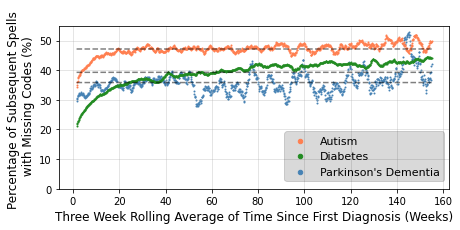

In [9]:

def ErrorProportionTime(df_FollowUp, ConditionName):
    ErrorName = 'SpellLevel_Error_'+ ConditionName

    df_Plot = df_FollowUp.copy()
    df_Plot = df_Plot.astype({'TimeDiff_FirstSpell':'int32'})
    
    Filter_Future = df_Plot.loc[:, 'Admission_date']>df_Plot.loc[:, 'FirstSpell_Discharge_date']
    df_Plot = df_Plot.loc[Filter_Future, :]    
    
    df_Errors_TimeDiff = df_Plot.groupby(by='TimeDiff_FirstSpell')[ErrorName].agg(['sum', 'count']).reset_index()
    df_Errors_TimeDiff.loc[:, 'Prop'] = 100 * (df_Errors_TimeDiff.loc[:, 'sum'] / df_Errors_TimeDiff.loc[:, 'count'])

    # Binning previous dataframes in TimeDiff intervals
    TimeDiff_Min = 1
    TimeDiff_Max = df_Errors_TimeDiff['TimeDiff_FirstSpell'].max()
    Interval = 1 # days
    N = np.floor( (TimeDiff_Max - TimeDiff_Min) / Interval ) .astype('int')
    Sum_List = []
    Count_List = []
    TimeDiffBin_List = []
    
#     for k in range(1,N+1):
#         Lower_TimeDiff = k*Interval
#         Upper_TimeDiff = Lower_TimeDiff+Interval
#         Filter_Interval = (df_Errors_TimeDiff['TimeDiff_First']>Lower_TimeDiff) & (df_Errors_TimeDiff['TimeDiff_First']<=Upper_TimeDiff)

    for nDays in range(TimeDiff_Min, TimeDiff_Max+Interval, Interval):
        Filter_Interval = (df_Errors_TimeDiff['TimeDiff_FirstSpell']==nDays)

        df_Sub = df_Errors_TimeDiff.loc[Filter_Interval, :]

        Sum = df_Sub['sum'].sum()
        Count = df_Sub['count'].sum()
        Sum_List.append(Sum)
        Count_List.append(Count)

#         TimeDiffBin_List.append(k*Interval/7)
        TimeDiffBin_List.append(nDays/7) # In weeks

    df_TimeDiff_Bins = pd.DataFrame( data = {'TimeDiffBin':TimeDiffBin_List,
                                                 'Errors_Sum':Sum_List,
                                                 'Patients_Count':Count_List} )
    df_TimeDiff_Bins.loc[:, 'Prop'] = 100 * (df_TimeDiff_Bins.loc[:, 'Errors_Sum'] / df_TimeDiff_Bins.loc[:, 'Patients_Count'])
    
    return df_TimeDiff_Bins

df_dementia_bins = ErrorProportionTime(df_dementia_FollowUp, 'Dementia')
df_autism_bins = ErrorProportionTime(df_autism_FollowUp, 'Autism')
df_diabetes_bins = ErrorProportionTime(df_diabetes_FollowUp, 'Diabetes')

# Plotting Proportion of Episodes with Errors w/r TimeDiff
fig, ax = plt.subplots(figsize=(7,3))

Window=7*3
X_dementia = df_dementia_bins['TimeDiffBin'].rolling(Window).mean()
Y_dementia = df_dementia_bins['Prop'].rolling(Window).mean()
X_autism = df_autism_bins['TimeDiffBin'].rolling(Window).mean()
Y_autism = df_autism_bins['Prop'].rolling(Window).mean()
X_diabetes = df_diabetes_bins['TimeDiffBin'].rolling(Window).mean()
Y_diabetes = df_diabetes_bins['Prop'].rolling(Window).mean()

Colors=['forestgreen', 'steelblue', 'coral'];


Opacity = 1
Size = 1
plt.scatter(X_autism, Y_autism,
           color=Colors[2],
           label='Autism',
           s = Size,
           alpha=Opacity,
           zorder=2)

plt.scatter(X_diabetes, Y_diabetes,
           color=Colors[0],
           s = Size,
           label='Diabetes',
           alpha=Opacity,
           zorder=2)

plt.scatter(X_dementia, Y_dementia,
           color=Colors[1],
           s = Size,
           label="Parkinson's Dementia",
           alpha=Opacity,
           zorder=1)

# plot mean values
Opacity = 0.5
plt.plot(X_autism, [Y_autism.mean() for x in X_autism],
           linestyle='--',
           color='black',
           alpha=Opacity,
           zorder=3)

plt.plot(X_dementia, [Y_dementia.mean() for x in X_autism],
           linestyle='--',
           color='black',
           alpha=Opacity,
           zorder=3)

plt.plot(X_diabetes, [Y_diabetes.mean() for x in X_autism],
           linestyle='--',
           color='black',
           alpha=Opacity,
           zorder=3)




# # Plot tangents
# def PlotTangents(X, Y, Color):
#     dX = np.diff(X)
#     dY = np.diff(Y)
#     dxdy = dY/dX
#     dxdy = [x for x in dxdy if not(math.isnan(x)) ]

#     y_Max = Y[X>=80].mean()
#     y_tangent = dxdy[0] * X
    
#     X_Extra = X[y_tangent>=y_Max]
#     print(X_Extra.min())

#     plt.plot( X[y_tangent<=y_Max], y_tangent[y_tangent<=y_Max],
#              color = Color,
#              alpha=0.4)
#     plt.plot( X, [y_Max for x in X],
#              color = Color,
#              linestyle='dashed')

# PlotTangents(df_dementia_bins['TimeDiffBin'], df_dementia_bins['Prop'], 'black')    
# PlotTangents(df_autism_bins['TimeDiffBin'], df_autism_bins['Prop'], 'black')    
# PlotTangents(df_diabetes_bins['TimeDiffBin'], df_diabetes_bins['Prop'], 'black')    

plt.grid('on', alpha=0.4)
plt.xlabel('Three Week Rolling Average of Time Since First Diagnosis (Weeks)', fontsize=12);
plt.ylabel('Percentage of Subsequent Spells \n with Missing Codes (%)', fontsize=12);
Legend = plt.legend(loc='lower right',
                     edgecolor='black',
                     facecolor='black', framealpha=0.15, fontsize=11,
                     bbox_to_anchor=(1, 0.013), ncol=1)
for handle in Legend.legendHandles:
    handle.set_sizes([20])

plt.ylim(0, 55)

# df_dementia_bins.head()

SaveFig = False
if SaveFig:
    plt.savefig(r"O:\GIRFT DiRAC\FlavienHardy\1_DataConsistency\Figures\Readmission_PropErrors_22.01.25.png",
                bbox_inches='tight', dpi=300)

 

In [22]:

# df = df_diabetes_ini
# Filter_prov = (df.loc[:, 'ProvCode'] == 'RAL') & (df.loc[:, 'HESID'] =='00DFD6F17DCE800873ADB5EFEE91264D')
# ColumnList = ['P_Spell_ID', 'HESID', 'Admission_date', 'ProvCode', 'Spell_Los', 'Discharge_date', 'SpellLevel_ICD10_Diabetes', 'SpellLevel_Error_Diabetes']
# df.loc[Filter_prov, ColumnList].head(50)

# Sum = df.loc[Filter_prov, 'SpellLevel_Error_Diabetes'].sum()
# Count = df.loc[Filter_prov, 'SpellLevel_Error_Diabetes'].shape[0]
# Prop = 100 * Sum / Count
# Prop

# Filter_LOS = (df.loc[:, 'Spell_Los']==0) & (df.loc[:, 'ProvCode'] == 'R0A')
# 100 * df.loc[Filter_LOS, :].shape[0] / df.loc[:, :].shape[0]                                            


## Errors across trusts

In [10]:

df_ini = df_diabetes_FollowUp.copy()
df = df_ini.copy()

# Mean and Median number of spells per patient across trusts
df = df.groupby(by=['ProvCode', 'HESID'])['P_Spell_ID'].agg(['count']).reset_index()
df_MeanMedianNumberSpell_Patient = df.groupby(by=['ProvCode'])['count'].agg(['mean', 'median']).reset_index()
df = pd.merge(df, df_MeanMedianNumberSpell_Patient, on='ProvCode', how='left')
df = df.drop(columns=['HESID', 'count']).rename(columns={'mean':'NumberSpellsPerPatient_Mean',
                                                         'median':'NumberSpellsPerPatient_Median'})
df = df.drop_duplicates(subset=['ProvCode'], keep='first').sort_values(by=['NumberSpellsPerPatient_Mean'], ascending=False)

# number of day-cases
Filter_0LS = df_ini.loc[:, 'Spell_Los_0']==1
df_0LS = df_ini.loc[Filter_0LS, :]
df_0LS = df_0LS.groupby(by=['ProvCode', 'HESID'])['P_Spell_ID'].agg(['count']).reset_index()
df_0LS_MeanMedianNumberSpell_Patient = df_0LS.groupby(by=['ProvCode'])['count'].agg(['mean', 'median']).reset_index()
df_0LS = pd.merge(df_0LS, df_0LS_MeanMedianNumberSpell_Patient, on='ProvCode', how='left')
df_0LS = df_0LS.drop(columns=['HESID', 'count']).rename(columns={'mean':'Number0LOSPerPatient_Mean',
                                                                 'median':'Number0LOSPerPatient_Median'})
df_0LS = df_0LS.drop_duplicates(subset=['ProvCode'], keep='first').sort_values(by=['Number0LOSPerPatient_Mean'],
                                                                               ascending=False)

df_Merged = pd.merge(df, df_0LS, on='ProvCode', how='left').fillna(0)



In [11]:

# --------------------------------------------------
def ErrorsByTrusts(df_ini, ConditionName, MinCount):
    df = df_ini.copy()

    df_trusts = df.groupby(by=['ProvCode'])['SpellLevel_Error_'+ConditionName].agg(['sum', 'count']).reset_index()
    df_trusts.loc[:, 'Prop'] = 100 * df_trusts.loc[:, 'sum'] / df_trusts.loc[:, 'count']

    Filter = df_trusts.loc[:, 'count'] > MinCount
    df_trusts = df_trusts.loc[Filter, :].sort_values(by=['count'], ascending=False)
    
    # Mean and Median number of spells per patient across trusts
    df = df.groupby(by=['ProvCode', 'HESID'])['P_Spell_ID'].agg(['count']).reset_index()
    df_MeanMedianNumberSpell_Patient = df.groupby(by=['ProvCode'])['count'].agg(['mean', 'median']).reset_index()
    df = pd.merge(df, df_MeanMedianNumberSpell_Patient, on='ProvCode', how='left')
    df = df.drop(columns=['HESID', 'count']).rename(columns={'mean':'NumberSpellsPerPatient_Mean',
                                                             'median':'NumberSpellsPerPatient_Median'})
    df = df.drop_duplicates(subset=['ProvCode'], keep='first').sort_values(by=['NumberSpellsPerPatient_Mean'], ascending=False)
    
    # Number of day-cases per patient
    Filter_0LS = df_ini.loc[:, 'Spell_Los_0']==1
    df_0LS = df_ini.loc[Filter_0LS, :]
    df_0LS = df_0LS.groupby(by=['ProvCode', 'HESID'])['P_Spell_ID'].agg(['count']).reset_index()
    df_0LS_MeanMedianNumberSpell_Patient = df_0LS.groupby(by=['ProvCode'])['count'].agg(['mean', 'median']).reset_index()
    df_0LS = pd.merge(df_0LS, df_0LS_MeanMedianNumberSpell_Patient, on='ProvCode', how='left')
    df_0LS = df_0LS.drop(columns=['HESID', 'count']).rename(columns={'mean':'Number0LOSPerPatient_Mean',
                                                                     'median':'Number0LOSPerPatient_Median'})
    df_0LS = df_0LS.drop_duplicates(subset=['ProvCode'], keep='first').sort_values(by=['Number0LOSPerPatient_Mean'],
                                                                                   ascending=False)
    
    df_Merged = pd.merge(df, df_0LS, on='ProvCode', how='left').fillna(0)
    df_trusts = pd.merge(df_trusts, df_Merged, on='ProvCode', how='left').fillna(0)
    
    # Proportion of day-cases
    Filter_0LS = df_ini.loc[:, 'Spell_Los_0']==1
    df_0LOS = df_ini.loc[Filter_0LS, :]
    df_0LOS = df_0LOS.groupby(by=['ProvCode'])['P_Spell_ID'].agg(['count']).reset_index().rename(columns={'count':'Number_0LOS'})
    df_trusts = pd.merge(df_trusts, df_0LOS, on='ProvCode', how='left').fillna(0)
    df_trusts.loc[:, 'Prop_0LOS'] = 100 * df_trusts.loc[:, 'Number_0LOS'] / df_trusts.loc[:, 'count']

    
    return df_trusts
# --------------------------------------------------

MinCount = 10
df_dementia_trusts =  ErrorsByTrusts(df_dementia_FollowUp, 'Dementia', MinCount)
df_autism_trusts =  ErrorsByTrusts(df_autism_FollowUp, 'Autism', MinCount)
df_diabetes_trusts =  ErrorsByTrusts(df_diabetes_FollowUp, 'Diabetes', MinCount)

df_diabetes_trusts.head(10)


,ProvCode,sum,count,Prop,NumberSpellsPerPatient_Mean,NumberSpellsPerPatient_Median,Number0LOSPerPatient_Mean,Number0LOSPerPatient_Median,Number_0LOS,Prop_0LOS
0,RAL,21576,24671,87.454907,28.620650,3.0,41.972274,2.0,22707.0,92.039236
1,RJ1,20125,23796,84.573037,19.929648,2.0,39.996190,2.0,20998.0,88.241721
2,RM3,12950,17640,73.412698,15.460123,3.0,23.176000,2.0,14485.0,82.114512
3,R0A,12807,16023,79.928852,14.686526,2.0,24.059859,1.0,13666.0,85.289896
4,RVJ,13111,15798,82.991518,20.543563,2.0,35.118812,2.0,14188.0,89.808837
5,RRK,7024,11219,62.608076,9.705017,2.0,13.338762,2.0,8190.0,73.001159
6,REM,6910,11023,62.687109,12.511918,3.0,16.703488,2.0,8619.0,78.191055
7,RGT,835,10492,7.958445,12.300117,2.0,24.631884,2.0,8498.0,80.995044
8,RM1,7211,9433,76.444397,14.227753,2.0,25.112853,1.0,8011.0,84.925262
9,RH8,596,8650,6.890173,16.290019,3.0,21.410405,2.0,7408.0,85.641618


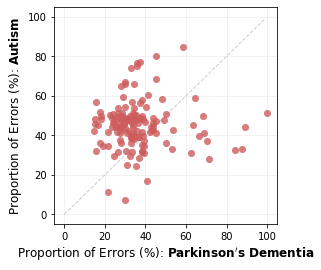

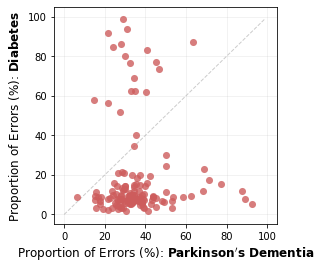

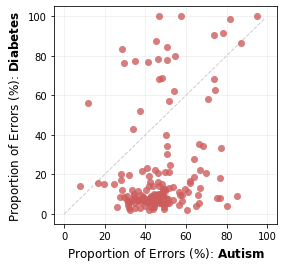

In [12]:

# --------------------------------------------------
def ScatterPlot(df_ini_1, df_ini_2):
    df_1 = df_ini_1.copy()
    df_2 = df_ini_2.copy()
    
    set_trusts_1 = set(df_1['ProvCode'].values)
    set_trusts_2 = set(df_2['ProvCode'].values)
    both_trusts = list( set_trusts_1.intersection(set_trusts_2) )
    both_trusts_string = '|'.join(both_trusts)

    Filter_1 = df_1.loc[:, 'ProvCode'].str.contains(both_trusts_string)
    Filter_2 = df_2.loc[:, 'ProvCode'].str.contains(both_trusts_string)
    
    df_1_Sub = df_1.loc[Filter_1, :]
    df_2_Sub = df_2.loc[Filter_2, :]
    
    X = df_1_Sub.loc[:, 'Prop']
    Y = df_2_Sub.loc[:, 'Prop']
    Hue = df_1_Sub.loc[:, 'Prop_0LOS']
    Size = df_1_Sub.loc[:, 'count']
    
    Color = 'indianred'
#     plt.scatter(X, Y,
#                 color=Color,
#                 alpha=0.7,
#                 zorder=2)
    
    sns.scatterplot(x=X, y=Y,
                color=Color, # hue=Hue, size=Hue,
                linewidth=0,
                alpha=0.8,
                s=50,
                zorder=2)    
    
    
    plt.grid('on', alpha=0.2)
    plt.xlim(0-5,100+5)
    plt.ylim(0-5,100+5)
    
    X_Identity = range(0, 100, 1)
    Y_Identity = X_Identity
    plt.plot(X_Identity, Y_Identity,
             linewidth=1,
             linestyle='dashed',
             color = [0, 0, 0, 0.2],
             zorder=1)

# --------------------------------------------------

SizeFigure = 4
plot1 = plt.figure(1, figsize=(SizeFigure,SizeFigure))
ScatterPlot(df_dementia_trusts, df_autism_trusts)
plt.xlabel("Proportion of Errors (%): $\\bf{Parkinson's}$ $\\bf{Dementia}$",
          size = 12);
plt.ylabel("Proportion of Errors (%): $\\bf{Autism}$",
          size = 12);

SaveFig = False
if SaveFig:
    plt.savefig(r"O:\GIRFT DiRAC\FlavienHardy\1_DataConsistency\Figures\ErrorByTrust_DementiaAutism_21.12.11.png",
                bbox_inches='tight', dpi=300)


plot2 = plt.figure(2, figsize=(SizeFigure,SizeFigure))
ScatterPlot(df_dementia_trusts, df_diabetes_trusts)
plt.xlabel("Proportion of Errors (%): $\\bf{Parkinson's}$ $\\bf{Dementia}$",
          size = 12);
plt.ylabel("Proportion of Errors (%): $\\bf{Diabetes}$",
          size = 12);

if SaveFig:
    plt.savefig(r"O:\GIRFT DiRAC\FlavienHardy\1_DataConsistency\Figures\ErrorByTrust_DementiaDiabetes_21.12.11.png",
                bbox_inches='tight', dpi=300)


plot3 = plt.figure(3, figsize=(SizeFigure,SizeFigure))
ScatterPlot(df_autism_trusts, df_diabetes_trusts)   
plt.xlabel("Proportion of Errors (%): $\\bf{Autism}$",
          size = 12);
plt.ylabel("Proportion of Errors (%): $\\bf{Diabetes}$",
          size = 12);

if SaveFig:
    plt.savefig(r"O:\GIRFT DiRAC\FlavienHardy\1_DataConsistency\Figures\ErrorByTrust_AutismDiabetes_21.12.11.png",
                bbox_inches='tight', dpi=300)



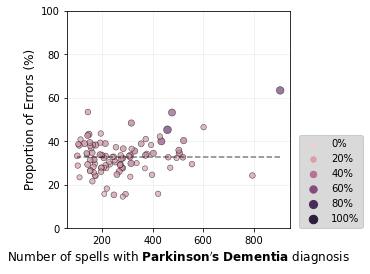

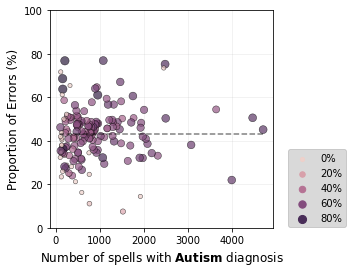

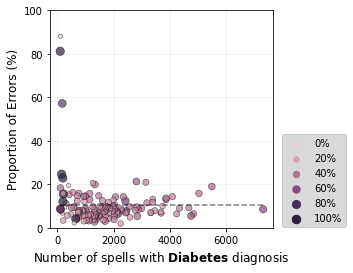

In [441]:

# Scatter plot for errors across trusts, for single condition
# --------------------------------------------------
def ErrorsAcrossTrusts(df_ini, ConditionName, CountMin, Color):
    df = df_ini
    

    # Optional: remove trusts with high proportion of zero-day case
    Filter = df_ini.loc[:, 'Prop_0LOS']<=100
    df = df.loc[Filter, :]

        
    # Scatter plot
    Filter = df.loc[:, 'count']>CountMin
    df_Sub = df.loc[Filter, :]
    X = df_Sub.loc[:, 'count']
    Y = df_Sub.loc[:, 'Prop']
#     plt.scatter(X, Y,
#                color=Color,
#                alpha=0.8)
    
    Hue = df.loc[:, 'Prop_0LOS']
    g = sns.scatterplot(x=X, y=Y,
                color=Color, hue=Hue, hue_norm=(0, 90),
                size=Hue, size_norm=(0, 90),
                linewidth=0.5, edgecolor='black',
                alpha=0.7,
                zorder=2)  
    
    # Legend box
    handles,labels = g.get_legend_handles_labels()
    handles_New = [handles[x] for x in [0, 1,2,3]] + handles[4:]
    labels_New =[ x + '%' for x in labels]
    g.legend(handles_New,
             labels_New,
             loc='lower right',
             edgecolor='black',
             facecolor='black', framealpha=0.15,
             bbox_to_anchor=(1.35, -0.02), ncol=1)

    

    # Mean line
#     Mean = 100*(df_Sub.loc[:, 'sum'].sum())/(df_Sub.loc[:, 'count'].sum())
    Mean = df_Sub.loc[:, 'Prop'].mean()
    
    plt.plot(X, [Mean]*len(X),
            linestyle='dashed',
            color='black',
            alpha=0.5)

    if len(ConditionName.split(' '))>1:
        Name_Bold =  "$\\bf{" + ConditionName.split(' ')[0] + "}$" + ' ' + "$\\bf{" + ConditionName.split(' ')[1] + "}$"
    else:
        Name_Bold =  "$\\bf{" + ConditionName + "}$"
        
    plt.xlabel("Number of spells with " + Name_Bold + " diagnosis",
              size = 12);
    plt.ylabel('Proportion of Errors (%)',
              size = 12);
    plt.ylim(0,100)
    plt.grid('on', alpha=0.2)
# --------------------------------------------------

SaveFig = False

CountMin = 100
Colors=['forestgreen', 'coral', 'steelblue'];

SizeFigure = [4, 4]
plot1 = plt.figure(1, figsize=(SizeFigure[0],SizeFigure[1]))
ErrorsAcrossTrusts(df_dementia_trusts, "Parkinson's Dementia", CountMin, Color = Colors[2])
if SaveFig:
    plt.savefig(r"O:\GIRFT DiRAC\FlavienHardy\1_DataConsistency\Figures\ErrorByTrust_Dementia_21.12.11.png",
                bbox_inches='tight', dpi=300)

plot2 = plt.figure(2, figsize=(SizeFigure[0],SizeFigure[1]))
ErrorsAcrossTrusts(df_autism_trusts, "Autism", CountMin, Color = Colors[1])
if SaveFig:
    plt.savefig(r"O:\GIRFT DiRAC\FlavienHardy\1_DataConsistency\Figures\ErrorByTrust_Autism_21.12.11.png",
                bbox_inches='tight', dpi=300)


plot3 = plt.figure(3, figsize=(SizeFigure[0], SizeFigure[1]))
# Filter = df_diabetes_trusts.loc[:, 'count']<50000
ErrorsAcrossTrusts(df_diabetes_trusts, "Diabetes", CountMin, Color = Colors[0])
if SaveFig:
    plt.savefig(r"O:\GIRFT DiRAC\FlavienHardy\1_DataConsistency\Figures\ErrorByTrust_Diabetes_21.12.11.png",
                bbox_inches='tight', dpi=300)


In [425]:


df_diabetes_trusts = df_diabetes_trusts.sort_values(by=['count'], ascending=False)
df_diabetes_trusts.head(20)

Filter_Error = df_diabetes_FollowUp['SpellLevel_Error_Diabetes']==1
Filter_Trust = df_diabetes_FollowUp['ProvCode']=='RVJ' # RGP, RVJ
Filter_R69 = df_diabetes_FollowUp['SpellLevel_ICD10'].str.contains('R69')

df_diabetes_FollowUp.loc[Filter_Error&Filter_Trust, :].iloc[50:100, :]
# df_diabetes_FollowUp.loc[Filter_Trust, :].shape[0]


,P_Spell_ID,HESID,LSOA_2011_Code,Admission_date,Discharge_date,EPIstart,EPIend,diagnosis_group,Spell_Los,sex,...,Change_ProvCode,Change_Region,Change_Main_Specialty_Description,Change_ProvCode_Type,SpellLevel_ICD10,SpellLevel_ICD10_Diabetes,SpellLevel_ICD10_DiabetesTypeII,SpellLevel_FirstDiagnosis,SubsequentSpell,SpellLevel_Error_Diabetes
23422,8059732,1AH0CQT2R1NTBZT,E01014460,2016-04-05,2016-04-05,2016-04-05,2016-04-05,N185~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1...,0,Male,...,0,0,0,0,N185,0,0,0,1,1
23423,8059733,1AH0CQT2R1NTBZT,E01014460,2016-04-07,2016-04-07,2016-04-07,2016-04-07,N185~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1...,0,Male,...,0,0,0,0,N185,0,0,0,1,1
23424,8059734,1AH0CQT2R1NTBZT,E01014460,2016-04-09,2016-04-09,2016-04-09,2016-04-09,N185~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1...,0,Male,...,0,0,0,0,N185,0,0,0,1,1
23425,8059735,1AH0CQT2R1NTBZT,E01014460,2016-04-12,2016-04-12,2016-04-12,2016-04-12,N185~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1...,0,Male,...,0,0,0,0,N185,0,0,0,1,1
23426,8059736,1AH0CQT2R1NTBZT,E01014460,2016-04-14,2016-04-14,2016-04-14,2016-04-14,N185~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1...,0,Male,...,0,0,0,0,N185,0,0,0,1,1
23427,8059737,1AH0CQT2R1NTBZT,E01014460,2016-04-16,2016-04-16,2016-04-16,2016-04-16,N185~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1...,0,Male,...,0,0,0,0,N185,0,0,0,1,1
23428,8059738,1AH0CQT2R1NTBZT,E01014460,2016-04-19,2016-04-19,2016-04-19,2016-04-19,N185~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1...,0,Male,...,0,0,0,0,N185,0,0,0,1,1
23429,8059739,1AH0CQT2R1NTBZT,E01014460,2016-04-21,2016-04-21,2016-04-21,2016-04-21,N185~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1...,0,Male,...,0,0,0,0,N185,0,0,0,1,1
23430,8059740,1AH0CQT2R1NTBZT,E01014460,2016-04-23,2016-04-23,2016-04-23,2016-04-23,N185~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1...,0,Male,...,0,0,0,0,N185,0,0,0,1,1
23431,8059741,1AH0CQT2R1NTBZT,E01014460,2016-04-26,2016-04-26,2016-04-26,2016-04-26,N185~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1...,0,Male,...,0,0,0,0,N185,0,0,0,1,1


In [393]:

Sum = df_diabetes_FollowUp[df_diabetes_FollowUp['ProvCode']=='RVJ']['SpellLevel_Error_Diabetes'].sum()
Count = df_diabetes_FollowUp[df_diabetes_FollowUp['ProvCode']=='RVJ']['SpellLevel_Error_Diabetes'].shape[0]
Prop = 100 * Sum / Count
Prop


74.65026292290902

## Error characteristics

In [91]:

def ErrorCharacteristics(df_ini, ConditionName):
    df = df_ini.copy()

    Filter_SubsequentEpisodes = (df.loc[:, 'SpellLevel_TimeDiff']>0)
#     Filter_SubsequentEpisodes = (df.loc[:, 'Admission_date']>df.loc[:, 'NewFirstSpell_Admission_date'])
    df = df.loc[Filter_SubsequentEpisodes, :]

    ErrorName = 'SpellLevel_Error_'+ConditionName
    Filter = (df.loc[:, ErrorName]==1)
    df_Errors = df.loc[Filter, :]
    df_NoErrors = df.loc[~Filter, :]
    
    print('Number of errors at spell level:', df_Errors.shape[0])
    print('Total number of subsequent spells:', df.shape[0])
    print('Proportion of errors: %0.2f' % (100*df_Errors.shape[0]/df.shape[0]), '%')

    # --------------------------------------------
    # Errors by age bands
    AgeMin_List = [0, 18, 40, 60, 80] + [999]
    AgeMax_List = [age-1 for age in AgeMin_List[1:] ] + [999]
    for k in range(len(AgeMin_List)):
        AgeMin = AgeMin_List[k]
        AgeMax = AgeMax_List[k]
        FilterAge = (df['age_of_patient']>=AgeMin) & (df['age_of_patient']<=AgeMax)

        df_Age = df.loc[FilterAge, :]
        Sum = df_Age.loc[:, ErrorName].sum()
        Count = df_Age.loc[:, ErrorName].count()
        Prop_Errors = 100 * Sum/Count
        print('Age band:', AgeMin, '-', AgeMax)
        print('\t Number of errors:', Sum, 'out of', Count, ', corresponding to %0.2f' % Prop_Errors, '%')

    print('\n')

    # --------------------------------------------
    # Errors by sex
    List = ['Male', 'Female']
    for sex in List:
        Filter_sex = (df.loc[:, 'sex']==sex)
        df_sex =  df.loc[Filter_sex, :]
        Sum = df_sex.loc[:, ErrorName].sum()
        Count = df_sex.loc[:, ErrorName].count()
        Prop_Errors = 100*Sum/Count
        print('Sex:', sex)
        print('\t Number of errors:', Sum, 'out of', Count, ', corresponding to %0.2f' % Prop_Errors, '%')

    SexString = '|'.join(List)
    Filter_Sex = df.loc[:, 'sex'].str.contains(SexString)
    df_MissingSex = df.loc[~Filter_Sex, :]
    Sum = df_MissingSex.loc[:, ErrorName].sum()
    Count = df_MissingSex.loc[:, ErrorName].count()
    Prop_Errors = 100*Sum/Count
    print('Sex:', 'Other/Missing')
    print('\t Number of errors:', Sum, 'out of', Count, ', corresponding to %0.2f' % Prop_Errors, '%')
    print('\n')
    
    print('\n')
    # --------------------------------------------
    # Ethnicity
    if 'Ethnicity' in df.columns:
        df.loc[:, 'Ethnicity'] = df.loc[:, 'Ethnicity'].fillna('not known')
        df.loc[:, 'Ethnicity'] = df.loc[:, 'Ethnicity'].str.lower()
        EthnicityList = [ str(x).lower() for x in set(df.loc[:, 'Ethnicity'].values) ]
#         Count = df.shape[0]
        for ethnicity in EthnicityList:
            Filter = df.loc[:, 'Ethnicity']==ethnicity
            Sum = df.loc[Filter, ErrorName].sum()
            Count = df.loc[Filter, ErrorName].shape[0]
            Prop = 100*Sum/Count
            print('Number of', ethnicity, ' :', Sum, 'corresponding to %0.2f' % Prop, '%')

    print('\n')
    # Errors by IMD deciles
    # --------------------------------------------
#     # Deprivation Quintile
#     ColumnList = ['LSOA code (2011)', 'Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)']
#     df_IMD_Sub = df_IMD[ColumnList]

#     df = pd.merge(df, df_IMD_Sub, left_on='LSOA_2011_Code', right_on='LSOA code (2011)', how='left')
#     df = df.drop(columns=['LSOA code (2011)'])
#     df = df.rename(columns={'Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)':'IMD Deciles'})

    if 'IMD Decile' in df.columns:
        Decile_List = range(1,10+1)
        for k in range(5):
            Decile_Max = Decile_List[k]*2
            Decile_Min = Decile_Max-1

            Filter_Quintiles = (df["IMD Decile"]>=Decile_Min) & (df["IMD Decile"]<=Decile_Max)
            Sum = df.loc[Filter_Quintiles, ErrorName].sum()
            Count = df.loc[Filter_Quintiles, ErrorName].count()
            Prop_Errors = 100*Sum/Count
            print('IMD Deciles:', Decile_Min, '-', Decile_Max)
            print('\t Number of errors:', Sum, 'out of', Count, ', corresponding to %0.2f' % Prop_Errors, '%')


Conditions = ['Dementia', 'Autism', 'Diabetes']
# ErrorCharacteristics(df_dementia_ini, Conditions[0])
ErrorCharacteristics(df_autism_ini, Conditions[1])
# ErrorCharacteristics(df_diabetes_ini, Conditions[2])


Number of errors at spell level: 185134
Total number of subsequent spells: 417901
Proportion of errors: 44.30 %
Age band: 0 - 17
	 Number of errors: 60732 out of 171939 , corresponding to 35.32 %
Age band: 18 - 39
	 Number of errors: 79385 out of 164640 , corresponding to 48.22 %
Age band: 40 - 59
	 Number of errors: 30002 out of 54358 , corresponding to 55.19 %
Age band: 60 - 79
	 Number of errors: 13092 out of 24037 , corresponding to 54.47 %
Age band: 80 - 998
	 Number of errors: 1896 out of 2871 , corresponding to 66.04 %
Age band: 999 - 999
	 Number of errors: 27 out of 56 , corresponding to 48.21 %


Sex: Male
	 Number of errors: 114498 out of 268185 , corresponding to 42.69 %
Sex: Female
	 Number of errors: 70636 out of 149716 , corresponding to 47.18 %


<ipython-input-91-9f7e4c5bf2ec>:52: RuntimeWarning: invalid value encountered in longlong_scalars
  Prop_Errors = 100*Sum/Count


Sex: Other/Missing
	 Number of errors: 0 out of 0 , corresponding to nan %




Number of other ethnic groups  : 5784 corresponding to 38.81 %
Number of mixed  : 1300 corresponding to 35.15 %
Number of not known  : 114659 corresponding to 46.04 %
Number of white  : 59342 corresponding to 43.11 %
Number of black or black british  : 1556 corresponding to 30.43 %
Number of asian or asian british  : 2493 corresponding to 33.13 %


IMD Deciles: 1 - 2
	 Number of errors: 54474 out of 120330 , corresponding to 45.27 %
IMD Deciles: 3 - 4
	 Number of errors: 43583 out of 96049 , corresponding to 45.38 %
IMD Deciles: 5 - 6
	 Number of errors: 34416 out of 80190 , corresponding to 42.92 %
IMD Deciles: 7 - 8
	 Number of errors: 28378 out of 64556 , corresponding to 43.96 %
IMD Deciles: 9 - 10
	 Number of errors: 22427 out of 52570 , corresponding to 42.66 %


## Errors related to outcome (spell level)

In [705]:

# Extract outcomes of interest at spell level
# --------------------------------------------------
def ErrorsAndOutcomes(df_ini, ConditionName):
    df = df_ini.copy()
    
    # Find First Spell
    Filter_Condition = df['SpellLevel_ICD10_'+ConditionName]==1
    df_Condition = df.loc[Filter_Condition, :]
    df_Condition = df_Condition.sort_values(by=['HESID', 'Admission_date', 'EPIstart', 'EPIend'])
    df_FirstSpells = df_Condition.drop_duplicates(subset=['HESID'], keep='first')[['HESID', 'P_Spell_ID',
                                                                                   'Admission_date', 'Discharge_date']]
    df = pd.merge(df, df_FirstSpells, on='HESID', how='left').rename(columns={'P_Spell_ID_x':'P_Spell_ID',
                                                                              'P_Spell_ID_y':'SpellLevel_P_Spell_ID_First',
                                                                              'Admission_date_x':'Admission_date',
                                                                              'Admission_date_y':'SpellLevel_Admission_date_First',
                                                                              'Discharge_date_x':'Discharge_date',
                                                                              'Discharge_date_y':'SpellLevel_Discharge_date_First'})

    # Find TimeDiff at Spell Level
    df.loc[:, 'SpellLevel_TimeDiff_First'] = (df['Admission_date'] - df['SpellLevel_Discharge_date_First']).dt.days
    Filter_First = df.loc[:, 'SpellLevel_TimeDiff_First']<0
    df.loc[Filter_First, 'SpellLevel_TimeDiff_First'] = 0
    Filter_FirstSpell = (df['P_Spell_ID'] == df['SpellLevel_P_Spell_ID_First'])
    df.loc[:, 'FirstSpell'] = np.where(Filter_FirstSpell, 1, 0)

    # 3 year follow-up
    Filter_FollowUp = (df['SpellLevel_TimeDiff_First']>0) & ((df['SpellLevel_TimeDiff_First']<365*3))
    df.loc[:, 'FollowUp'] = np.where(Filter_FollowUp, 1, 0)
    df_FollowUp = df.loc[Filter_FollowUp, :]

    # Number of admissions in 3 years
    df_grouped = df_FollowUp.groupby(by=['HESID'])['P_Spell_ID']
    df['FollowUp_Number Readmissions'] = df_grouped.transform('count')
    df['FollowUp_Number Readmissions'] = df['FollowUp_Number Readmissions'].fillna(0) # Patients with no readmissions in follow-up period
    df['FollowUp_Number Readmissions'] = df['FollowUp_Number Readmissions'].astype(int)

    # Death within 3 years (for dementia)
    df['FollowUp_MORT'] = df_FollowUp.groupby(by=['HESID'])['MORT'].transform('sum')
    df['FollowUp_MORT'] = df['FollowUp_MORT'].fillna(0).astype(int) # Patients who died after follow-up period

    # Average Length of stay for readmissions?
    df_grouped = df_FollowUp.groupby(by=['HESID'])['Spell_Los']
    df['FollowUp_MeanLos'] = df_grouped.transform('mean')
    df['FollowUp_MeanLos'] = df['FollowUp_MeanLos'].fillna(0)

    return df
# --------------------------------------------------

df_dementia_ErrorsOutcomes = ErrorsAndOutcomes(df_dementia_ini, 'Dementia')
df_autism_ErrorsOutcomes = ErrorsAndOutcomes(df_autism_ini, 'Autism')
df_diabetes_ErrorsOutcomes = ErrorsAndOutcomes(df_diabetes_ini, 'Diabetes')


display(df_dementia_ErrorsOutcomes.head())
display(df_autism_ErrorsOutcomes.head())
display(df_diabetes_ErrorsOutcomes.head())


,Unnamed: 0,P_Spell_ID,HESID,LSOA_2011_Code,Admission_date,Discharge_date,EPIstart,EPIend,diagnosis_group,Spell_Los,...,SpellLevel_Error_Dementia,SpellLevel_P_Spell_ID_First,SpellLevel_Admission_date_First,SpellLevel_Discharge_date_First,SpellLevel_TimeDiff_First,FirstSpell,FollowUp,FollowUp_Number Readmissions,FollowUp_MORT,FollowUp_MeanLos
0,0,1421,00007773EC3BDCAF9441AFA32057315D,E01008446,2020-09-04,2020-09-18,2020-09-07,2020-09-18,G20X~F023~R410~R441~R630~D529~E559~I951~M549~G...,14,...,0,1421,2020-09-04,2020-09-18,0,1,0,0,0,0.0
1,1,8786,0002CF863631188C9524321D4710EF31,E01021334,2014-07-03,2014-07-17,2014-07-12,2014-07-17,N390~U898~N182~G20XD~F023A~K590~R33X~R600~R680...,14,...,0,8786,2014-07-03,2014-07-17,0,1,0,0,0,0.0
2,2,8787,0002CF863631188C9524321D4710EF31,E01021334,2014-12-15,2015-01-02,2014-12-15,2015-01-02,J690~A419~N179~G20X~D696~I959~N390~E86X~R680~L...,18,...,1,8786,2014-07-03,2014-07-17,151,0,1,2,1,10.5
3,3,8788,0002CF863631188C9524321D4710EF31,E01021334,2015-01-23,2015-01-26,2015-01-23,2015-01-26,J181~N179~E86X~N390~T830~L890~G20X~I10X~M199~F...,3,...,1,8786,2014-07-03,2014-07-17,190,0,1,2,1,10.5
4,4,18075,0005CFF4524423B83400095C9724194C,E01003252,2017-06-25,2017-07-18,2017-06-30,2017-07-18,G20X~F023~A047~M628~N179~N183~E877~L088~B956~L...,23,...,0,18075,2017-06-25,2017-07-18,0,1,0,0,0,0.0


,Unnamed: 0,P_Spell_ID,HESID,LSOA_2011_Code,Admission_date,Discharge_date,EPIstart,EPIend,diagnosis_group,Spell_Los,...,SpellLevel_Error_Autism,SpellLevel_P_Spell_ID_First,SpellLevel_Admission_date_First,SpellLevel_Discharge_date_First,SpellLevel_TimeDiff_First,FirstSpell,FollowUp,FollowUp_Number Readmissions,FollowUp_MORT,FollowUp_MeanLos
0,0,106,00000BB5E7DC3BAB1D477FC33FB398CD,E01020243,2015-09-09,2015-09-11,2015-09-09,2015-09-11,I214~I251~I501~E780~F845~F419~J459~-1~-1~-1~-1...,2,...,0,106,2015-09-09,2015-09-11,0,1,0,0,0,0.0
1,1,107,00000BB5E7DC3BAB1D477FC33FB398CD,E01020243,2018-11-30,2018-11-30,2018-11-30,2018-11-30,Z121~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1...,0,...,1,106,2015-09-09,2015-09-11,1176,0,0,0,0,0.0
2,2,754,00004A8B9CDE0E438C531952B76D7498,E01011057,2017-12-22,2017-12-22,2017-12-22,2017-12-22,R040~F840~F900~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-...,0,...,0,754,2017-12-22,2017-12-22,0,1,0,0,0,0.0
3,3,755,00004A8B9CDE0E438C531952B76D7498,E01011057,2019-04-15,2019-04-18,2019-04-15,2019-04-18,R040~R31X~F900~R278~-1~-1~-1~-1~-1~-1~-1~-1~-1...,3,...,1,754,2017-12-22,2017-12-22,479,0,1,1,0,3.0
4,4,2093,0000BD0A02E524D41AF95EC3BED233D8,E01008202,2014-11-24,2014-11-25,2014-11-25,2014-11-25,R104~R11X~F339~F419~F845~F171~Z028~-1~-1~-1~-1...,1,...,0,2093,2014-11-24,2014-11-25,0,1,0,0,0,0.0


,Unnamed: 0,P_Spell_ID,HESID,LSOA_2011_Code,Admission_date,Discharge_date,EPIstart,EPIend,diagnosis_group,Spell_Los,...,SpellLevel_Error_Diabetes,SpellLevel_P_Spell_ID_First,SpellLevel_Admission_date_First,SpellLevel_Discharge_date_First,SpellLevel_TimeDiff_First,FirstSpell,FollowUp,FollowUp_Number Readmissions,FollowUp_MORT,FollowUp_MeanLos
0,0,232,00001150E47271E571C90DB437F0FE9E,E01008370,2020-06-21,2020-07-10,2020-06-21,2020-07-10,S7230~R296~D509~N179~Z115~K573~L97X~E115~I10X~...,19,...,0,232,2020-06-21,2020-07-10,0,1,0,0,0,0.0
1,1,233,00001150E47271E571C90DB437F0FE9E,E01008370,2020-11-03,2020-11-10,2020-11-03,2020-11-10,K922~K573~R296~D509~Z115~L97X~E115~I10X~N183~M...,7,...,0,232,2020-06-21,2020-07-10,116,0,1,2,0,6.5
2,2,234,00001150E47271E571C90DB437F0FE9E,E01008370,2020-11-17,2020-11-23,2020-11-17,2020-11-23,R54X~K573~D509~I10X~N183~F019~M109~M199~Z115~Z...,6,...,1,232,2020-06-21,2020-07-10,130,0,1,2,0,6.5
3,3,6598,000202E7374045AE3034CB9A03844988,E01033369,2016-07-01,2016-07-12,2016-07-01,2016-07-12,I7021~E115~L97X~L031~L089~B968~R000~R33X~Y832~...,11,...,0,6598,2016-07-01,2016-07-12,0,1,0,0,0,0.0
4,4,6599,000202E7374045AE3034CB9A03844988,E01033369,2016-08-10,2016-08-26,2016-08-10,2016-08-26,T814~R33X~I10X~E119~Z922~Z864~Y838~T810~Y838~-...,16,...,0,6598,2016-07-01,2016-07-12,29,0,1,10,0,3.3


###  Analyse errors related to outcomes


In [709]:


def AnalyseErrorOutcomes(df_ini, ConditionName):
    df = df_ini

    # Keep unique patients with latest spell
#     df = df.sort_values(by=['HESID', 'Admission_date', 'EPIstart', 'EPIend']).drop_duplicates(subset=['HESID'], keep='last')

    # Split error/no-error dataframes
    Filter_Errors = (df.loc[:, 'SpellLevel_Error_'+ConditionName]==1)
    df_Errors = df.loc[Filter_Errors, :]
        
    df_NoErrors = df.loc[~Filter_Errors, :]
    Filter_NotFirst = (df_NoErrors.loc[:, 'FirstSpell']==0)
    df_NoErrors = df_NoErrors.loc[Filter_NotFirst, :]
    
#     display(df_NoErrors.head())
    df_Errors = df_Errors.sort_values(by=['HESID', 'Admission_date', 'EPIstart', 'EPIend']).drop_duplicates(subset=['HESID'], keep='last')
    df_NoErrors = df_NoErrors.sort_values(by=['HESID', 'Admission_date', 'EPIstart', 'EPIend']).drop_duplicates(subset=['HESID'], keep='last')

    # Number of admissions in follow-up period
    NumberReadmissions_describe = df_Errors.loc[:, 'FollowUp_Number Readmissions'].describe()
    NumberReadmissions_NoErrors_describe = df_NoErrors.loc[:, 'FollowUp_Number Readmissions'].describe()

    print('Number of Readmissions:')
    print('\t \033[1m ERRORS \033[0m: Mean number of readmissions per patient: %0.2f' % NumberReadmissions_describe['mean'],
         '( %0.2f' % NumberReadmissions_describe['std'], ')')
    print('\t NO ERRORS: Mean number of readmissions per patient: %0.2f' % NumberReadmissions_NoErrors_describe['mean'],
         '( %0.2f' % NumberReadmissions_NoErrors_describe['std'], ')')

    print('\t \033[1m ERRORS \033[0m: Median number of readmissions per patient: %0.2f' % NumberReadmissions_describe['50%'],
          '(', NumberReadmissions_describe['25%'], '-', NumberReadmissions_describe['75%'], ')')
    print('\t NO ERRORS: Median number of readmissions per patient: %0.2f' % NumberReadmissions_NoErrors_describe['50%'],
          '(', NumberReadmissions_NoErrors_describe['25%'], '-', NumberReadmissions_NoErrors_describe['75%'], ')')

    # Mortality within follow-up period
    print('Mortality rate')
    Mortality_Errors = 100*df_Errors.loc[:, 'FollowUp_MORT'].mean()
    Mortality_NoErrors = 100*df_NoErrors.loc[:, 'FollowUp_MORT'].mean()
    print('\t \033[1m ERRORS \033[0m: Mortality rate %0.2f' % Mortality_Errors, ' %')
    print('\t NO ERRORS: Mortality rate %0.2f' % Mortality_NoErrors, ' %')

    # Mean Length-of-stay
    print('Length of stay')
    LOS_Errors_describe = df_Errors.loc[:, 'FollowUp_MeanLos'].describe()
    LOS_NoErrors_describe = df_NoErrors.loc[:, 'FollowUp_MeanLos'].describe()

    print('\t \033[1m ERRORS \033[0m: Mean LOS %0.2f' % LOS_Errors_describe['mean'],
          '( %0.2f' % LOS_Errors_describe['std'], ')', 'days' )
    print('\t NO ERRORS: Mean LOS %0.2f' % LOS_NoErrors_describe['mean'],
          '( %0.2f' % LOS_NoErrors_describe['std'], ')', 'days' )

    print('\t \033[1m ERRORS \033[0m: Median LOS %0.2f' % LOS_Errors_describe['50%'],
          ' (%0.2f' % LOS_Errors_describe['25%'], '- %0.2f' % LOS_Errors_describe['75%'], ')', ' days')
    print('\t NO ERRORS: Median LOS %0.2f' % LOS_NoErrors_describe['50%'],
          ' (%0.2f' % LOS_NoErrors_describe['25%'], '- %0.2f' % LOS_NoErrors_describe['75%'], ')', ' days')

print('---------------------')
print('\033[1m DEMENTIA \033[0m')    
AnalyseErrorOutcomes(df_dementia_ErrorsOutcomes, 'Dementia')

# print('---------------------')
# print('\033[1m AUTISM \033[0m')    
# AnalyseErrorOutcomes(df_autism_ErrorsOutcomes, 'Autism')

# print('---------------------')
# print('\033[1m DIABETES \033[0m')    
# AnalyseErrorOutcomes(df_diabetes_ErrorsOutcomes, 'Diabetes')


---------------------
 DEMENTIA 
Number of Readmissions:
	  ERRORS : Mean number of readmissions per patient: 3.57 ( 6.34 )
	 NO ERRORS: Mean number of readmissions per patient: 2.68 ( 5.88 )
	  ERRORS : Median number of readmissions per patient: 3.00 ( 1.0 - 5.0 )
	 NO ERRORS: Median number of readmissions per patient: 2.00 ( 1.0 - 3.0 )
Mortality rate
	  ERRORS : Mortality rate 21.39  %
	 NO ERRORS: Mortality rate 24.73  %
Length of stay
	  ERRORS : Mean LOS 8.82 ( 13.95 ) days
	 NO ERRORS: Mean LOS 10.01 ( 14.06 ) days
	  ERRORS : Median LOS 5.25  (0.33 - 12.00 )  days
	 NO ERRORS: Median LOS 6.00  (1.00 - 13.56 )  days


In [708]:
df_dementia_ini[df_dementia_ini['HESID']=='0008CDC45EDC959EDC5C9715AE741CEB']
df_dementia_ini[df_dementia_ini['HESID']=='000C0782F72D054C318991233AD2FE03']

,Unnamed: 0,P_Spell_ID,HESID,LSOA_2011_Code,Admission_date,Discharge_date,EPIstart,EPIend,diagnosis_group,Spell_Los,...,Main_Specialty_Description_First,Main_Specialty_Description_Change,Missing_Age,IMD Score,Missing_IMD_score,SpellLevel_ICD10,SpellLevel_ICD10_Dementia,SpellLevel_Admission_date_First,SpellLevel_ProvCode_First,SpellLevel_Error_Dementia
18,18,41801,000C0782F72D054C318991233AD2FE03,E01005919,2014-04-14,2014-05-23,2014-04-16,2014-05-23,N390~E876~N179~R33X~F059~G20XD~F023A~L988~I679...,39,...,General medicine,0,0,46.094,0,N390~N179~R33X~F059~G20X~L988~I679~F171~E876~G...,1,2014-04-14,RWJ,0
19,19,41802,000C0782F72D054C318991233AD2FE03,E01005919,2014-08-04,2014-08-05,2014-08-04,2014-08-05,T830~Y846~G20X~I10X~Z867~-1~-1~-1~-1~-1~-1~-1~...,1,...,General medicine,1,0,46.094,0,T830~Y846~G20X~I10X~Z867,0,2014-04-14,RWJ,1
20,20,41803,000C0782F72D054C318991233AD2FE03,E01005919,2014-11-13,2014-11-14,2014-11-13,2014-11-14,K590~R194~R222~G20X~R410~F171~-1~-1~-1~-1~-1~-...,1,...,General medicine,1,0,46.094,0,K590~R194~R222~G20X~R410~F171,0,2014-04-14,RWJ,1
21,21,41804,000C0782F72D054C318991233AD2FE03,E01005919,2015-01-03,2015-01-28,2015-01-03,2015-01-28,S7200~W014~E86X~J22X~N179~N47X~Q549~R33X~I959~...,25,...,General medicine,1,0,46.094,0,S7200~W014~E86X~J22X~N179~N47X~Q549~R33X~I959~...,1,2014-04-14,RWJ,0
22,22,41805,000C0782F72D054C318991233AD2FE03,E01005925,2015-10-08,2015-10-14,2015-10-08,2015-10-14,N390~F019~G20X~J449~M8199~Z935~Z867~-1~-1~-1~-...,6,...,General medicine,1,0,6.888,0,N390~F019~G20X~J449~M8199~Z935~Z867,1,2014-04-14,RWJ,0
23,23,41806,000C0782F72D054C318991233AD2FE03,E01005925,2016-03-23,2016-03-23,2016-03-23,2016-03-23,M8199~G20X~J449~F019~Z878~-1~-1~-1~-1~-1~-1~-1...,0,...,General medicine,1,0,6.888,0,M8199~G20X~J449~F019~Z878,1,2014-04-14,RWJ,0
24,24,41807,000C0782F72D054C318991233AD2FE03,E01005925,2017-04-05,2017-04-05,2017-04-05,2017-04-05,M8199~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-...,0,...,General medicine,1,0,6.888,0,M8199,0,2014-04-14,RWJ,1
25,25,41808,000C0782F72D054C318991233AD2FE03,E01005925,2018-01-01,2018-02-28,2018-01-01,2018-02-28,A419~J181~Y95X~J690~N390~B967~N179~E86X~E870~F...,58,...,General medicine,1,0,6.888,0,A419~J181~Y95X~J690~N390~B967~N179~E86X~E870~F...,1,2014-04-14,RWJ,0
26,26,41809,000C0782F72D054C318991233AD2FE03,E01005897,2018-03-28,2018-03-28,2018-03-28,2018-03-28,T830~F019~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~...,0,...,General medicine,1,0,22.692,0,T830~F019,1,2014-04-14,RWJ,0
